In [51]:
import json
import pprint
import pandas as pd
import io
import yaml
import pylab
!pip install numpy==1.16.1
import numpy as np
import os
import glob

In [52]:

'''import sys
reload(sys)
sys.setdefaultencoding('utf-8')'''

'''def _decode_dict(data):
    rv = {}
    for key, value in data.iteritems():
        if isinstance(key, unicode):
            key = key.encode('utf-8')
        if isinstance(value, unicode):
            value = value.encode('utf-8')
        elif isinstance(value, list):
            value = _decode_list(value)
        elif isinstance(value, dict):
            value = _decode_dict(value)
        rv[key] = value
    return rv
def _decode_list(data):
    rv = []
    for item in data:
        if isinstance(item, unicode):
            item = item.encode('utf-8')
        elif isinstance(item, list):
            item = _decode_list(item)
        elif isinstance(item, dict):
            item = _decode_dict(item)
        rv.append(item)
    return rv'''

def parser(file_path):
    with io.open(file_path, encoding='utf-8') as f:
        #io.open(f, encoding='utf-8-sig')
        #raw_data = yaml.safe_load(f)
        raw_data = json.load(f, encoding ='utf-8')
        #raw_data = json.load(f, object_hook=_decode_dict)
    return raw_data



In [53]:
path_list = []
path_list = os.listdir('data')
print(path_list)
for x in path_list:
    if x[0]=='K':# 디렉터리인가?
        now_num = now_name.split('_')[-1]
        print(now_num)
        now_name = x

image_name = 'image_'+ now_num
print(image_name)
label_name = 'label_'+ now_num
print(label_name)
raw_data = parser('clip_226.json')
#raw_data = parser(now_name +'.json')


['.DS_Store', 'preprocess.py', 'KETI_MULTIMODAL_0000000497', 'clip_13', 'example_226.json', 'audio_utils.py']
0000000497
image_0000000497
label_0000000497


In [54]:
columns = ['clip_id', 'nr_frame', 'script', 'script_start', 'script_end', 'sound_emotion', 'sound_arousal', 'sound_valence']
df = pd.DataFrame(columns=columns)
df

,clip_id,nr_frame,script,script_start,script_end,sound_emotion,sound_arousal,sound_valence


In [55]:
info = {}

temp = set()

data = raw_data['data']

sound_flag = False
text_flag = False

for i in data:
    info[i] = {}
    info[i]['clip_id'] = raw_data['clip_id']
    info[i]['nr_frame'] = raw_data['nr_frame']
    info[i]['situation'] = raw_data['situation']

    for j in data[i].keys(): # j can be '1' or '2'
        if 'emotion' in data[i][j]:
            emotion = data[i][j]['emotion']
#             print(emotion)
            if 'sound' in emotion:
                info[i]['sound_arousal'] = emotion['sound']['arousal']
                info[i]['sound_emotion'] = emotion['sound']['emotion']
                info[i]['sound_valence'] = emotion['sound']['valence']
#                 sound_flag = True
        if 'text' in data[i][j]:
            info[i]['script'] = data[i][j]['text']['script']
            info[i]['script_start'] = data[i][j]['text']['script_start']
            info[i]['script_end'] = data[i][j]['text']['script_end']
#             text_flag = True

#         if sound_flag and text_flag:
#             break
#     if sound_flag and text_flag:
# #         break
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 

                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1035': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1036': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1037': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1038': {'clip_id': '226',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1039': {'clip_id': '226',
          'nr_frame': '2010',
          'scrip

          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1132': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1133': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
    

                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1175': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1176': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은

 '1249': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1250': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1251': {'clip_id': '226',
        

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1270': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1271': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1370': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1371': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,


          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1482': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1483': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다.

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1513': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1514': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '젊은 사람이 마음도 좋지.',
          'script_end': 1528,
          'script_start': 1441,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal

          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1624': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1625': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다.

          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1642': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1643': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까

          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1736': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1737': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직

          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '176': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1760': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1761': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '받아 주셨으면 좋겠어요. 마음이 쓰여서요.',
          'script_end': 1798,
          'script_start': 1742,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 

          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '186': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1860': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1861': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1893': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1894': {'clip_id': '226',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arous

                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '242': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '243': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '244': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '245': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '246': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손

 '317': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '318': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '319': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '320': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '321': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '앗. 오랜만에 오셨네요.',
         'script_end': 380,
         'script_start': 321,
         'situ

         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '425': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '426': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아

         'sound_valence': 7.0},
 '457': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '458': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '459': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'sit

         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '560': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '561': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                  

 '601': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '602': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '603': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '604': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '605': {'clip_id': '226',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 

         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '708': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '709': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다.

 '742': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '743': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '744': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation':

         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '845': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '846': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
    

 '889': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '890': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 1.0,
         'sound_emotion': 'neu',
         'sound_valence': 5.0},
 '891': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '(@상황; 손사래 치며) 어휴. 아가씨가 왜 죄송해.',
         'script_end': 941,
         'script_start': 870,
      

         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '973': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '974': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '975': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start

         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '997': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '998': {'clip_id': '226',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
     

In [56]:
for i in info.keys():
#     print(info[i])
    try:
        info[i]['frame'] = i
#         print(type(info[i]['frame']))
    except:
        print(type(i))
    df = df.append(info[i], ignore_index=True)
pprint.pprint(info)

{'1000': {'clip_id': '226',
          'frame': '1000',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1001': {'clip_id': '226',
          'frame': '1001',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'script_end': 1012,
          'script_start': 941,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'fear',
          'sound_valence': 4.0},
 '1002': {'clip_id': '226',
          'frame': '1002',
          'nr_frame': '2010',
          'script': '많이 안 좋으세요?',
          'sc

          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1112': {'clip_id': '226',
          'frame': '1112',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1113': {'clip_id': '226',
         

          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1216': {'clip_id': '226',
          'frame': '1216',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1217': {'clip_id': '226',
         

          'frame': '1328',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1329': {'clip_id': '226',
          'frame': '1329',
          'nr_frame': '2010',
          'script': '급하게 재수술을 하게 되었는데. 아직 경과를 보고 있어요. 지나가다가 보였는데 괜히 마음이 쓰여서 '
                    '들어와봤지요.',
          'script_end': 1334,
          'script_start': 1039,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 3.0,
          'sound_emotion': 'sad',
          'sound_valence': 3.0},
 '1330': {

          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1424': {'clip_id': '226',
          'frame': '1424',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1425': {'clip_id': '226',
          'frame': '1425',
          'nr_frame': '2010',
          'script': '쾌차하시길 빌게요.',
          'script_end': 1426,
          'script_start': 1334,
      

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '153': {'clip_id': '226',
         'frame': '153',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1530': {'clip_id': '226',
          'frame': '1530',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1531': {'clip_id': '226',
          'frame': '1531',
 

          'frame': '1627',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1628': {'clip_id': '226',
          'frame': '1628',
          'nr_frame': '2010',
          'script': '아직 주문 안하셨죠? 오늘 제가 음료 서비스로 내어드릴게요.',
          'script_end': 1698,
          'script_start': 1528,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 1.0,
          'sound_emotion': 'neu',
          'sound_valence': 5.0},
 '1629': {'clip_id': '226',
          'frame': '1629',
          'nr_frame': '2010',
          'script': '아직 주문 안하

          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '173': {'clip_id': '226',
         'frame': '173',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1730': {'clip_id': '226',
          'frame': '1730',
          'nr_frame': '2010',
          'script': '아니에요. 그럴거 없어요.',
          'script_end': 1742,
          'script_start': 1698,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 2.0,
          'sound_emotion': 'sur',
          'sound_valence': 6.0},
 '1731': {'clip_id': '226',
          'frame': '1731',
          'nr_frame'

 '1841': {'clip_id': '226',
          'frame': '1841',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1842': {'clip_id': '226',
          'frame': '1842',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.',
          'script_end': 1918,
          'script_start': 1798,
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
          'sound_arousal': 4.0,
          'sound_emotion': 'hap',
          'sound_valence': 7.0},
 '1843': {'clip_id': '226',
          'frame': '1843',
          'nr_frame': '2010',
          'script': '그러면 뭐. 네. 고마워요.'

 '1932': {'clip_id': '226',
          'frame': '1932',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1933': {'clip_id': '226',
          'frame': '1933',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1934': {'clip_id': '226',
          'frame': '1934',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1935': {'clip_id': '226',
          'frame': '1935',
          'nr_frame': '2010',
          'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                       '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '1936': {'clip_id': '226',
          'f

         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '306': {'clip_id': '226',
         'frame': '306',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '307': {'clip_id': '226',
         'frame': '307',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '308': {'clip_id': '226',
         'frame': '308',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '309': {'clip_id': '226',
         'frame': '309',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화

         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '430': {'clip_id': '226',
         'frame': '430',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '431': {'clip_id': '226',
         'frame': '431',
         'nr_frame': '2010',
         'script': '네. 안녕하세요. 오랜만이죠?',
         'script_end': 484,
         'script_start': 380,
         'situation': 

 '511': {'clip_id': '226',
         'frame': '511',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '512': {'clip_id': '226',
         'frame': '512',
         'nr_frame': '2010',
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'},
 '513': {'clip_id': '226',
         'frame': '513',
         'nr_frame': '2010',
         'script': '(@상황; 활짝 웃으며) 네. 그때 아내 분이랑…오신다고 하셨는데… 오늘도 혼자 오셨나봐요.',
         'script_end': 581,
         'script_start': 513,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 5.0,
         'sound_emotion': 'hap',
         'sound_valence': 7.0},
 '514': {'clip_id': '226',
         'frame': '514',
         'nr_frame'

         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '648': {'clip_id': '226',
         'frame': '648',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '649': {'clip_id': '226',
         'frame': '649',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 

 '753': {'clip_id': '226',
         'frame': '753',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '754': {'clip_id': '226',
         'frame': '754',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
         'script_end': 787,
         'script_start': 629,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 6.0,
         'sound_emotion': 'sad',
         'sound_valence': 4.0},
 '755': {'clip_id': '226',
         'frame': '755',
         'nr_frame': '2010',
         'script': '그러게요. 집사람이 갑자기 또 안 좋아져서.',
    

         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '856': {'clip_id': '226',
         'frame': '856',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 7.0,
         'sound_emotion': 'sad',
         'sound_valence': 3.0},
 '857': {'clip_id': '226',
         'frame': '857',
         'nr_frame': '2010',
         'script': '어머…죄송해요.',
         'script_end': 859,
         'script_start': 787,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한

 '955': {'clip_id': '226',
         'frame': '955',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '956': {'clip_id': '226',
         'frame': '956',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'script_start': 941,
         'situation': '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. '
                      '안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.',
         'sound_arousal': 2.0,
         'sound_emotion': 'fear',
         'sound_valence': 4.0},
 '957': {'clip_id': '226',
         'frame': '957',
         'nr_frame': '2010',
         'script': '많이 안 좋으세요?',
         'script_end': 1012,
         'scr

In [57]:
df

,clip_id,nr_frame,script,script_start,script_end,sound_emotion,sound_arousal,sound_valence,frame,situation
0,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,140,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,141,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
2,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,142,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
3,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,143,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
4,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,144,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
...,...,...,...,...,...,...,...,...,...,...
1865,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,2005,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1866,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,2006,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1867,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,2007,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1868,226,2010,NaN,NaN,NaN,NaN,NaN,NaN,2008,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...


In [58]:
df[df['sound_emotion'].notnull()]

,clip_id,nr_frame,script,script_start,script_end,sound_emotion,sound_arousal,sound_valence,frame,situation
181,226,2010,앗. 오랜만에 오셨네요.,321,380,hap,6.0,7.0,321,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
182,226,2010,앗. 오랜만에 오셨네요.,321,380,hap,6.0,7.0,322,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
183,226,2010,앗. 오랜만에 오셨네요.,321,380,hap,6.0,7.0,323,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
184,226,2010,앗. 오랜만에 오셨네요.,321,380,hap,6.0,7.0,324,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
185,226,2010,앗. 오랜만에 오셨네요.,321,380,hap,6.0,7.0,325,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
...,...,...,...,...,...,...,...,...,...,...
1774,226,2010,그러면 뭐. 네. 고마워요.,1798,1918,hap,4.0,7.0,1914,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1775,226,2010,그러면 뭐. 네. 고마워요.,1798,1918,hap,4.0,7.0,1915,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1776,226,2010,그러면 뭐. 네. 고마워요.,1798,1918,hap,4.0,7.0,1916,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...
1777,226,2010,그러면 뭐. 네. 고마워요.,1798,1918,hap,4.0,7.0,1917,까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 ...


In [59]:
import numpy as np
npy_save = np.array(df)
npy_save

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

In [60]:
np.save('clean_data.npy', npy_save)

In [61]:
clean_data = np.load('clean_data.npy',allow_pickle=True)

In [62]:
clean_data

array([['226', '2010', nan, ..., nan, '140',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '141',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '142',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ...,
       ['226', '2010', nan, ..., nan, '2007',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2008',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.'],
       ['226', '2010', nan, ..., nan, '2009',
        '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']],
      dtype=object)

# load and match frame

### get duration of mp4 file

In [63]:
import subprocess as sp
import json

def probe(filename):
    command = ["ffprobe",
            "-loglevel",  "quiet",
            "-print_format", "json",
             "-show_format",
             "-show_streams",
             filename
             ]

    pipe = sp.Popen(command, stdout=sp.PIPE, stderr=sp.STDOUT)
    out, err = pipe.communicate()
    return json.loads(out)

def duration(filename):
     #Video's duration in seconds, return a float number
    
    _json = probe(filename)

    if 'format' in _json:
        if 'duration' in _json['format']:
            return float(_json['format']['duration'])

    if 'streams' in _json:
        # commonly stream 0 is the video
        for s in _json['streams']:
            if 'duration' in s:
                return float(s['duration'])

    # if everything didn't happen,
    # we got here because no single 'return' in the above happen.
    raise Exception('I found no duration')

In [64]:
duration(filename='clip_226.mp4')

67.07

# After parsing

In [65]:

import os

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
!pip install librosa
import librosa
# And the display module for visualization
import librosa.display

In [66]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
print(clean_data.shape)
all_real_fr_num = clean_data.shape[0] #총개수
print(all_real_fr_num)
print(clean_data[0])
all_fr_num = clean_data[0][1] #써있는전체개수
print(all_fr_num)
start_fr_num = clean_data[0][8] #시작프레임
print(start_fr_num) 

(1870, 10)
1870
['226' '2010' nan nan nan nan nan nan '140'
 '까페. 오랜만에 온 손님에게 인사하러 온 직원. 손님은 아내의 병세가 악화되었다는 이야기를 한다. 안타까운 마음에 직원은 음료 서비스를 주려고 한다. 마주 보고 앉아 대화를 나눈다.']
2010
140


In [67]:

audio_path = '/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4' #자동화
print(audio_path)
y, sr = librosa.load(audio_path)
#y, sr = librosa.load('clip_226.mp4')

/Users/stella/dev/korean-audio-sentiment-analysis/clip_226.mp4


In [68]:
print(y.shape) 
y = y.tolist()

(1478894,)


In [69]:
print(sr) #sampling rate
sr_f = float(sr)

22050


In [70]:
t = np.array(list(range(0,1478894,1)))
t = t*(1/sr_f)
print(t)
print(t.shape)
t = t.tolist()

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 6.70698866e+01
 6.70699320e+01 6.70699773e+01]
(1478894,)


<function matplotlib.pyplot.show(*args, **kw)>

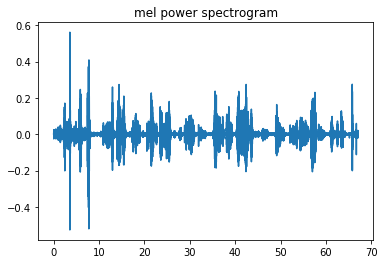

In [71]:

plt.plot(t,y)
# Put a descriptive title on the plot
plt.title('mel power spectrogram')
plt.show

In [72]:
import pandas as pd
frame_info_s =[]
frame_info_e =[]
bef_e = ''
label = []
check = 0
# frame_info : all_real_fr_num (#총개수)
# y : y.shape
#print(len(y))
#print(all_real_fr_num)
fract = len(y)/all_real_fr_num # 프레임수(이미지)에 대한 y 의 비율
print(fract)
for i in range(0, clean_data.shape[0]):
    now_e = clean_data[i][5]
    if(bef_e!=now_e): #앞과 다를때
        if(check==1):
            frame_info_e.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            check = 0
        if(pd.notnull(now_e)): #nan 이 아니면서
            print(now_e)
            label.append(now_e)
            #print(i)
            frame_info_s.append(round((float(clean_data[i][8])- float(start_fr_num) -1)*fract)) #번째 frame-> y 비율곱로 저장
            bef_e = now_e
            check = 1
            #print((float(clean_data[i][8])- float(start_fr_num) -1))
if(check==1):
    frame_info_e.append(len(y))            
print(frame_info_s) #변화되기 직전 순간이 저장됨
print(len(frame_info_s))
print(len(frame_info_e))
#print(clean_data[180])
#print(clean_data[181])


790.8524064171123
hap
sad
neu
fear
sad
neu
hap
neu
sur
neu
hap
[142353, 385936, 576531, 633473, 710185, 944278, 1028108, 1097703, 1232148, 1266946, 1311233]
11
11


129701
182688
56943
56150
234094
72758
69596
134445
34798
44287
94903
(11,)
(128, 254)
(128, 254)
(128, 357)
(128, 357)
(128, 112)
(128, 112)
(128, 110)
(128, 110)
(128, 458)
(128, 458)
(128, 143)
(128, 143)
(128, 136)
(128, 136)
(128, 263)
(128, 263)
(128, 68)
(128, 68)
(128, 87)
(128, 87)
(128, 186)
(128, 186)


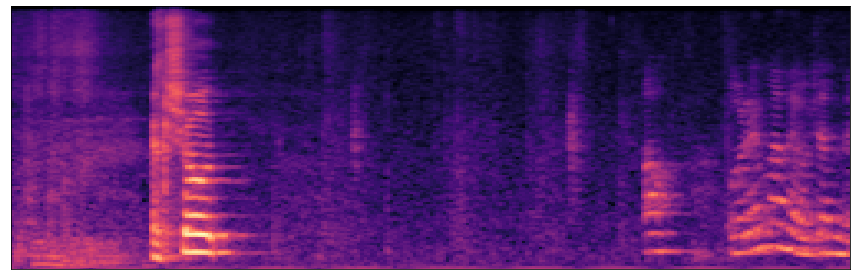

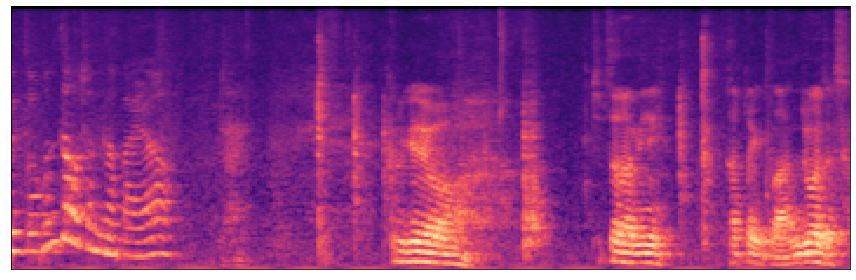

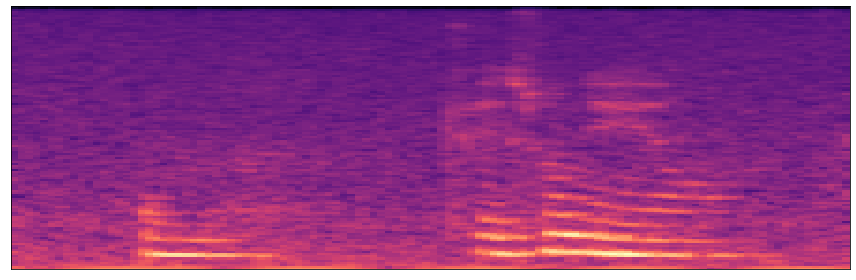

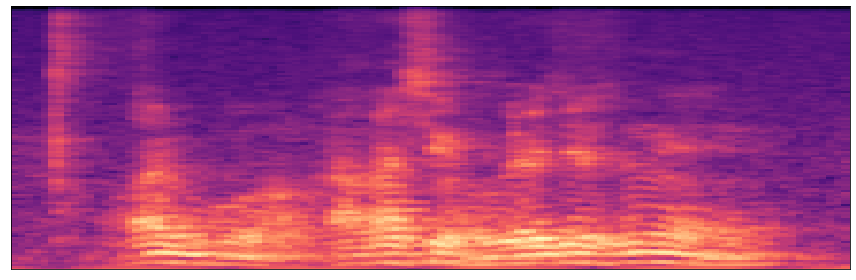

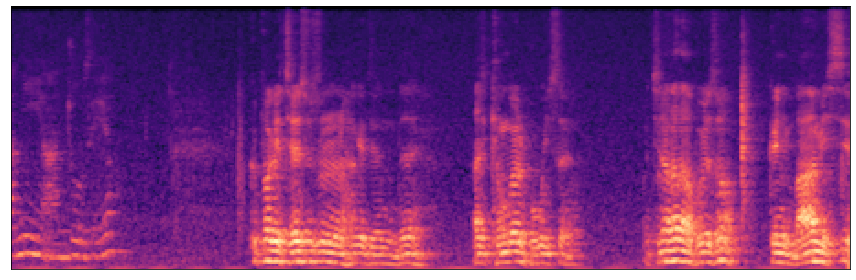

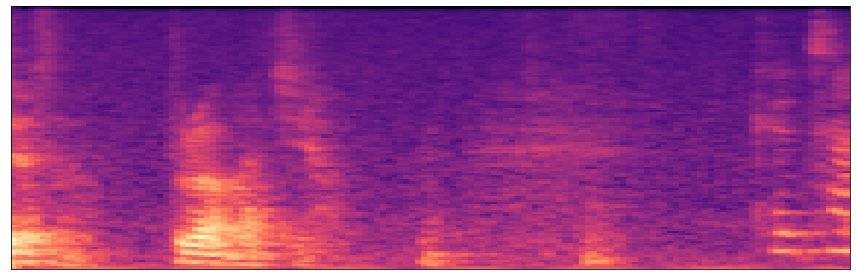

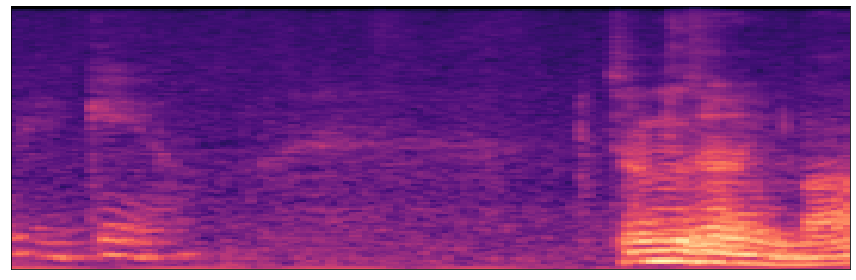

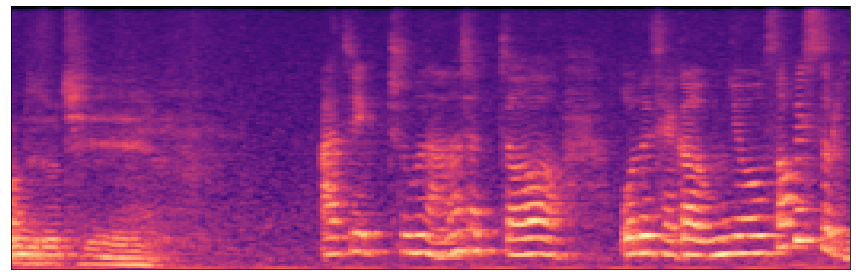

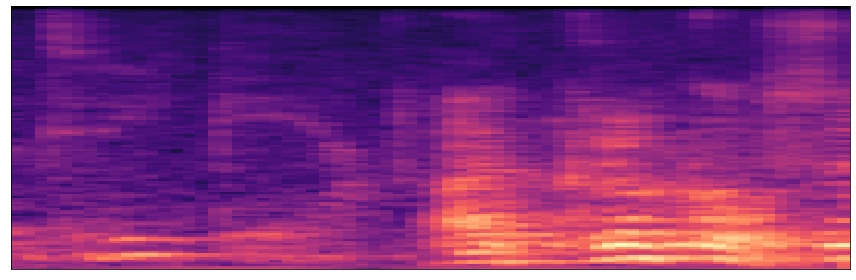

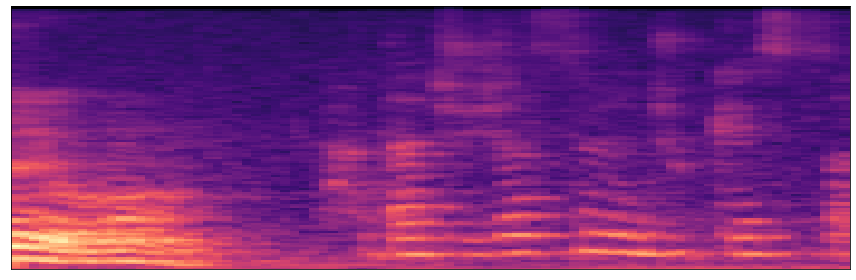

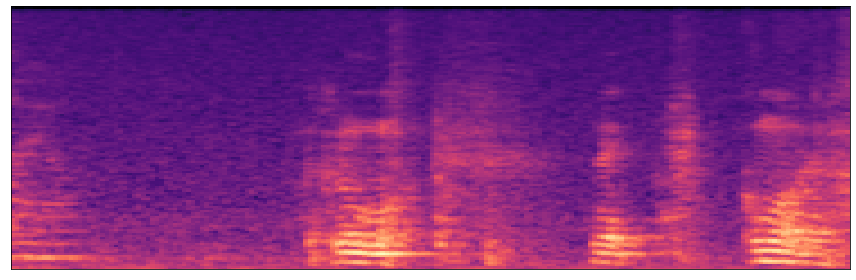

In [73]:
1478894
k= 0
new_arr = []
all_arr = []
for i in range(len(y)):
    if(i>=frame_info_s[k]):
        new_arr.append(y[i])
        if(i==frame_info_e[k]):
            all_arr.append(new_arr)
            print(len(new_arr))
            new_arr = []
            if(k<(len(frame_info_e)-1)):
                k = k+1
all_arr = np.asarray(all_arr) 
print(all_arr.shape)           
S = []
image = []
# Let's make and display a mel-scaled power (energy-squared) spectrogram
for i in range(len(all_arr)):
    
    S = librosa.feature.melspectrogram(np.asarray(all_arr[i]), sr=sr, n_mels=128)
    print(S.shape)
   
    
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    print(log_S.shape)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='off', y_axis='off')

    # Put a descriptive title on the plot
    #plt.title('mel power spectrogram')

    # draw a color bar
    #plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()
    plt.savefig(image_name + ".png")

    S = []

In [74]:
# padding 등 고려 방법만 확정
# data loader -> 다른팀 형식 고려 안해도 되나
# 언어 기준으로 자른것 이므로 순간순간으로 하려면... 몇초간격으로 할것이냐
#

def create_tfrecord(dataset_list):
    print("Start converting...")
    options = tf.python_io.\
        TFRecordOptions(compression_type=tf.python_io.TFRecordCompressionType.GZIP)
    writer = tf.python_io.TFRecordWriter(\
        path="tfrecord/tfrecord_practice.tfrecords",
        options=options
    )
    for dataset in dataset_list:
        audio_file_path = dataset["audio_file_path"]
        script_file_path = dataset["script_file_path"]
        
        # 데이터셋을 미리 전처리하여 TFRecord로 저장
        audio = audio_process.get_audio(audio_file_path)
        
        script = get_script(script_file_path)
        script = script_pad(script)
        
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "audio": _bytes_feature(audio.tostring()),
                    "script": _bytes_feature(script.encode("utf-8")) # string 타입을 bytes 타입으로 변환
                }
            )
        )
        writer.write(example.SerializeToString())
    
    writer.close()
    print("Done...")

In [181]:
print(type(image))
print(len(image))
image = np.array(image)
print(type(label))
print(len(label))
print(label)
#확인중

<class 'list'>
11


ValueError: could not broadcast input array from shape (128,254) into shape (128)

In [113]:
np.save('image_test.npy', image)

ValueError: could not broadcast input array from shape (128,279) into shape (128)